In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [48]:
df=load_iris()
data_original=load_iris()

In [49]:
df=df.data

In [50]:
df=list(df)

In [51]:
type(df)

list

In [52]:
df

[array([5.1, 3.5, 1.4, 0.2]),
 array([4.9, 3. , 1.4, 0.2]),
 array([4.7, 3.2, 1.3, 0.2]),
 array([4.6, 3.1, 1.5, 0.2]),
 array([5. , 3.6, 1.4, 0.2]),
 array([5.4, 3.9, 1.7, 0.4]),
 array([4.6, 3.4, 1.4, 0.3]),
 array([5. , 3.4, 1.5, 0.2]),
 array([4.4, 2.9, 1.4, 0.2]),
 array([4.9, 3.1, 1.5, 0.1]),
 array([5.4, 3.7, 1.5, 0.2]),
 array([4.8, 3.4, 1.6, 0.2]),
 array([4.8, 3. , 1.4, 0.1]),
 array([4.3, 3. , 1.1, 0.1]),
 array([5.8, 4. , 1.2, 0.2]),
 array([5.7, 4.4, 1.5, 0.4]),
 array([5.4, 3.9, 1.3, 0.4]),
 array([5.1, 3.5, 1.4, 0.3]),
 array([5.7, 3.8, 1.7, 0.3]),
 array([5.1, 3.8, 1.5, 0.3]),
 array([5.4, 3.4, 1.7, 0.2]),
 array([5.1, 3.7, 1.5, 0.4]),
 array([4.6, 3.6, 1. , 0.2]),
 array([5.1, 3.3, 1.7, 0.5]),
 array([4.8, 3.4, 1.9, 0.2]),
 array([5. , 3. , 1.6, 0.2]),
 array([5. , 3.4, 1.6, 0.4]),
 array([5.2, 3.5, 1.5, 0.2]),
 array([5.2, 3.4, 1.4, 0.2]),
 array([4.7, 3.2, 1.6, 0.2]),
 array([4.8, 3.1, 1.6, 0.2]),
 array([5.4, 3.4, 1.5, 0.4]),
 array([5.2, 4.1, 1.5, 0.1]),
 array([5.

In [53]:
df=pd.DataFrame(df,columns=['1','2','3','4'])


In [54]:
df.head()

,1,2,3,4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
data_original.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
df['flower']=data_original.target

In [57]:
df

,1,2,3,4,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [59]:
df=df.drop(['3','4'],axis='columns')

In [60]:
df.head()

,1,2,flower
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


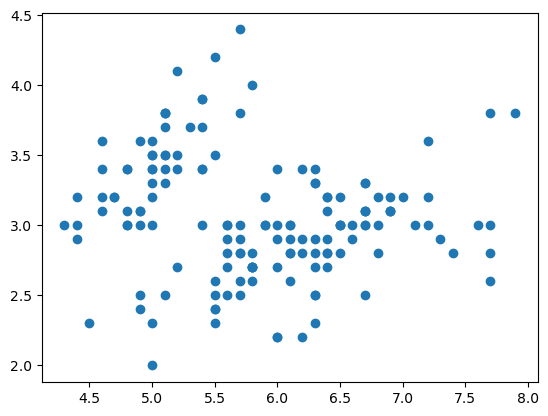

In [62]:
plt.scatter(df['1'],df['2'])

In [70]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [71]:
y_pred=km.fit_predict(df[['1','2']])

c:\Users\siddg\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\siddg\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
df['cluster_no']=y_pred

In [74]:
df

,1,2,flower,cluster_no
0,5.1,3.5,0,2
1,4.9,3.0,0,2
2,4.7,3.2,0,2
3,4.6,3.1,0,2
4,5.0,3.6,0,2
...,...,...,...,...
145,6.7,3.0,2,1
146,6.3,2.5,2,0
147,6.5,3.0,2,1
148,6.2,3.4,2,1


In [75]:
df0=df[df.cluster_no==0]
df1=df[df.cluster_no==1]
df2=df[df.cluster_no==2]

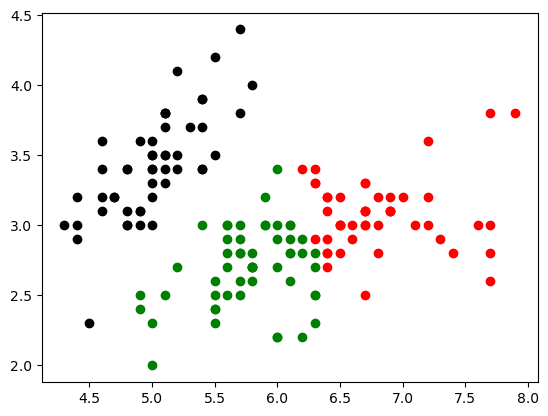

In [78]:
plt.scatter(df0['1'],df0['2'],color='green')
plt.scatter(df1['1'],df1['2'],color='red')
plt.scatter(df2['1'],df2['2'],color='black')

In [80]:
scaler=MinMaxScaler()
scaler.fit(df[['2']])
df['2']=scaler.transform(df[['2']])

In [81]:
df

,1,2,flower,cluster_no
0,5.1,0.625000,0,2
1,4.9,0.416667,0,2
2,4.7,0.500000,0,2
3,4.6,0.458333,0,2
4,5.0,0.666667,0,2
...,...,...,...,...
145,6.7,0.416667,2,1
146,6.3,0.208333,2,0
147,6.5,0.416667,2,1
148,6.2,0.583333,2,1


In [82]:
scaler.fit(df[['1']])
df['1']=scaler.transform(df[['1']])

In [83]:
df

,1,2,flower,cluster_no
0,0.222222,0.625000,0,2
1,0.166667,0.416667,0,2
2,0.111111,0.500000,0,2
3,0.083333,0.458333,0,2
4,0.194444,0.666667,0,2
...,...,...,...,...
145,0.666667,0.416667,2,1
146,0.555556,0.208333,2,0
147,0.611111,0.416667,2,1
148,0.527778,0.583333,2,1


c:\Users\siddg\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\siddg\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


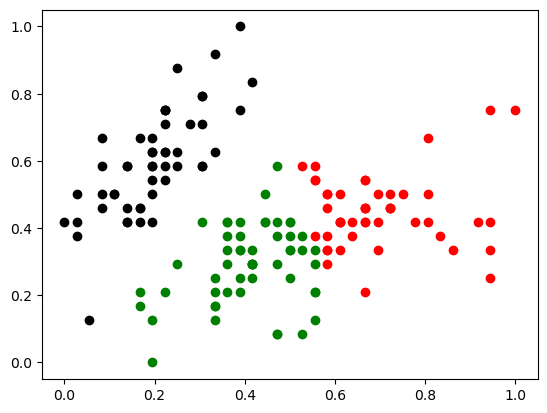

In [84]:
df0=df[df.cluster_no==0]
df1=df[df.cluster_no==1]
df2=df[df.cluster_no==2]
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['1','2']])
df['cluster_no']=y_pred
plt.scatter(df0['1'],df0['2'],color='green')
plt.scatter(df1['1'],df1['2'],color='red')
plt.scatter(df2['1'],df2['2'],color='black')